
=== Naive Bayes ===
Accuracy: 96.86 %
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



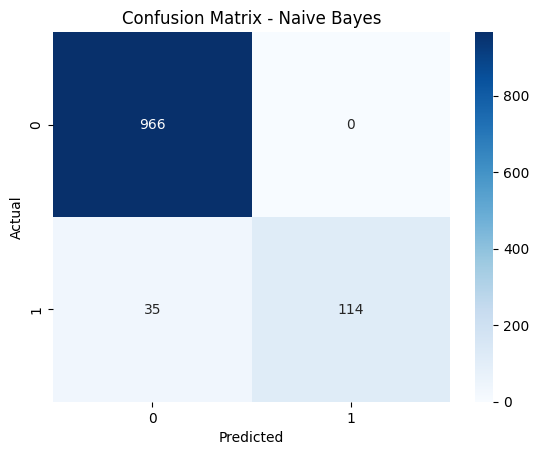

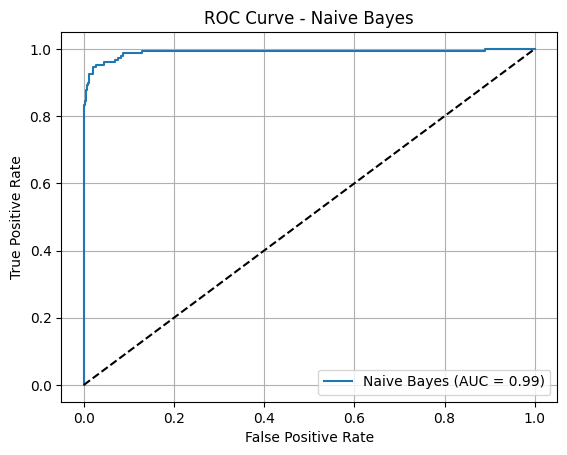


=== Logistic Regression ===
Accuracy: 96.77 %
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.76      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



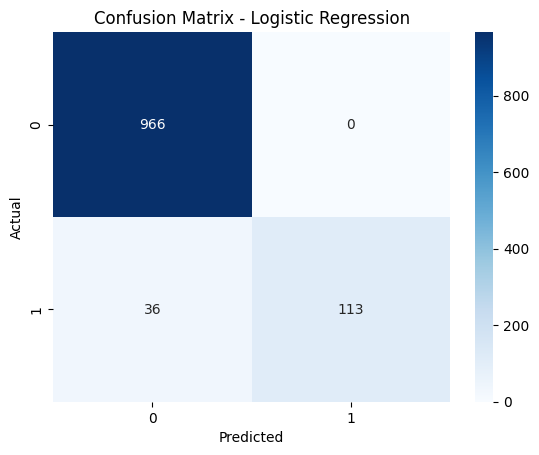

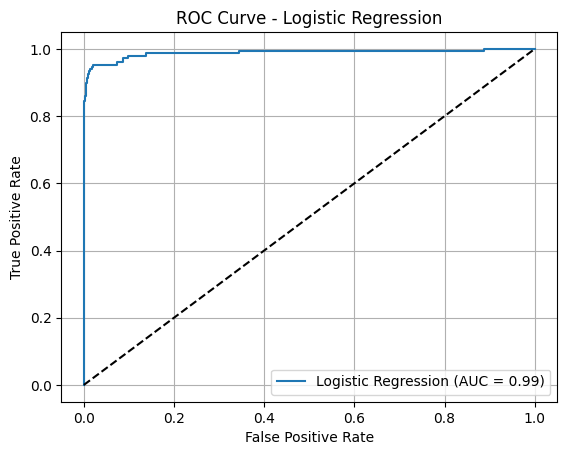


=== Support Vector Machine ===
Accuracy: 98.39 %
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



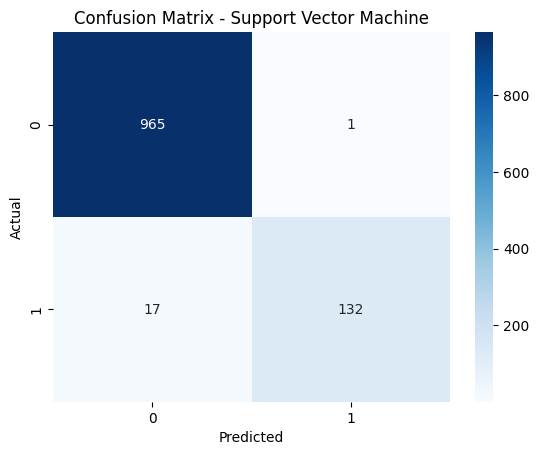

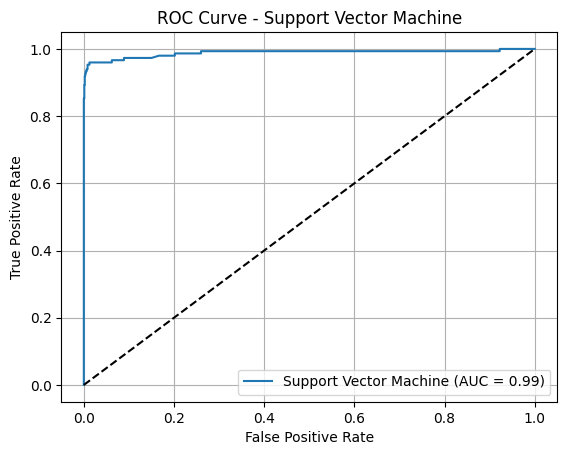


=== Random Forest ===
Accuracy: 97.22 %
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.79      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



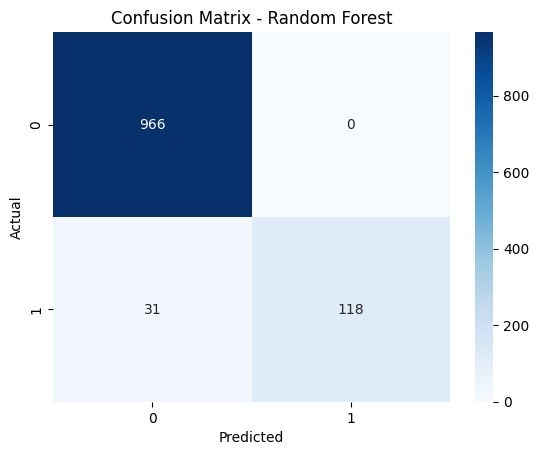

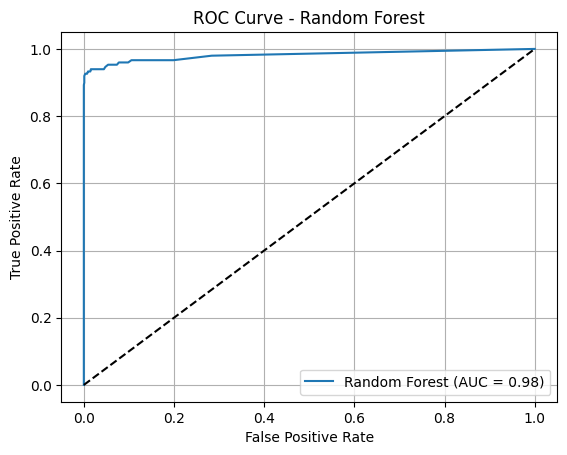


=== Decision Tree ===
Accuracy: 94.35 %
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       966
           1       0.91      0.64      0.75       149

    accuracy                           0.94      1115
   macro avg       0.93      0.81      0.86      1115
weighted avg       0.94      0.94      0.94      1115



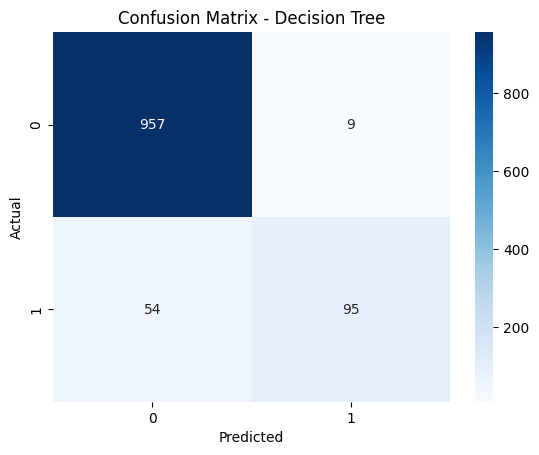

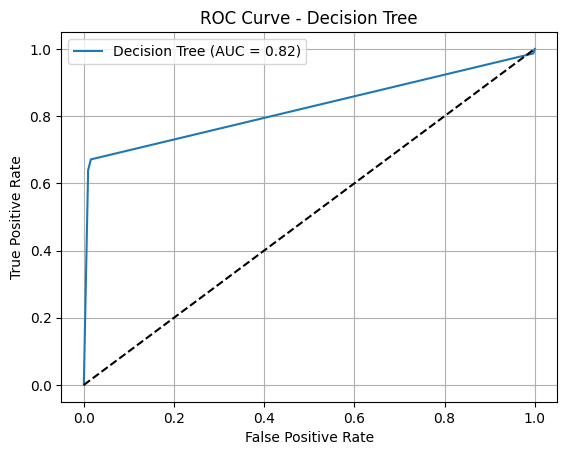


=== Gradient Boosting ===
Accuracy: 96.23 %
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.99      0.72      0.84       149

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



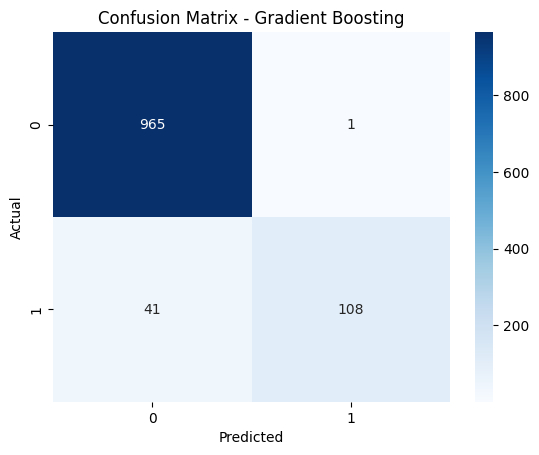

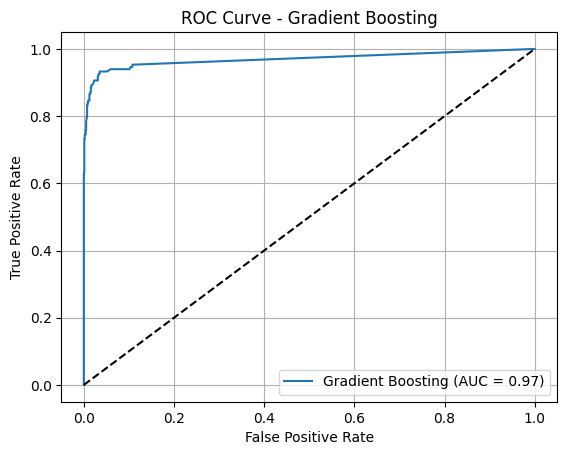


=== K-Nearest Neighbors ===
Accuracy: 91.21 %
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       966
           1       1.00      0.34      0.51       149

    accuracy                           0.91      1115
   macro avg       0.95      0.67      0.73      1115
weighted avg       0.92      0.91      0.89      1115



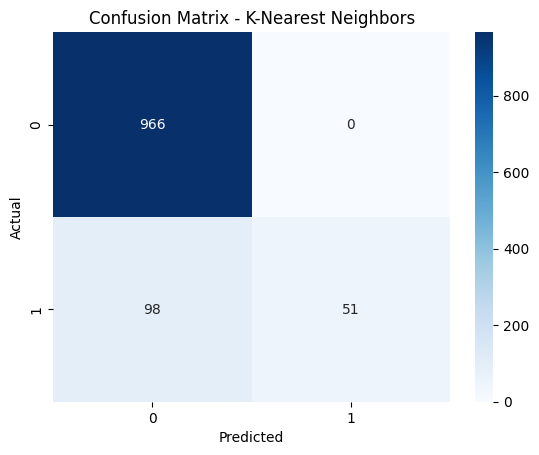

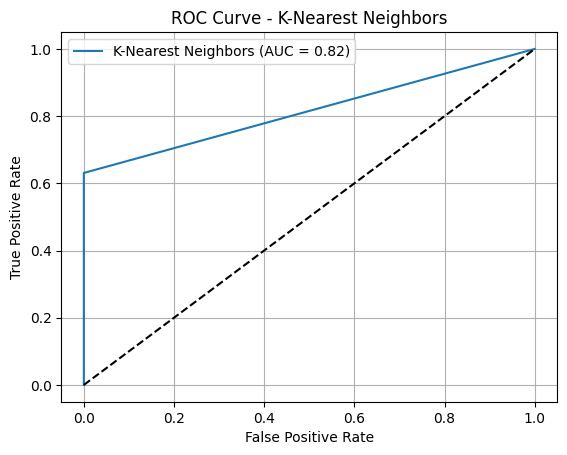

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:21:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== XGBoost ===
Accuracy: 97.04 %
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       0.98      0.80      0.88       149

    accuracy                           0.97      1115
   macro avg       0.97      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



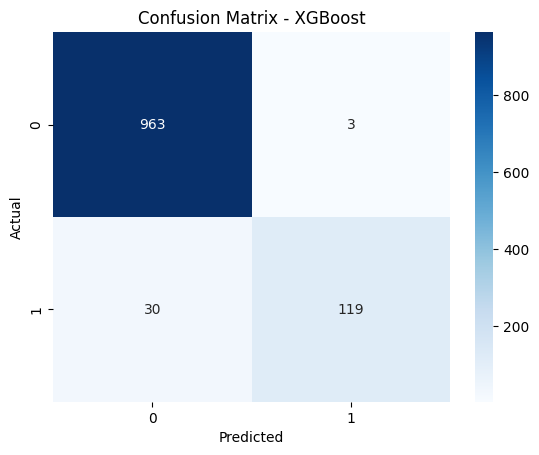

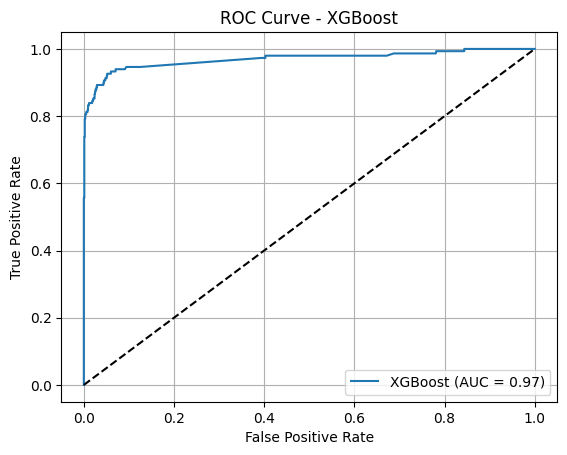

In [2]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc
)
import xgboost as xgb

# Step 2: Load and clean dataset
df = pd.read_csv('/content/spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'text']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label'], test_size=0.2, stratify=df['label'], random_state=42)

# Step 4: Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 5: Evaluation function
def evaluate_model(model, name):
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    print(f"\n=== {name} ===")
    print("Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test_tfidf)[:, 1]
    else:
        y_scores = model.decision_function(X_test_tfidf)

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"ROC Curve - {name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid()
    plt.show()

# Step 6: List of models
models = [
    (MultinomialNB(), "Naive Bayes"),
    (LogisticRegression(max_iter=1000), "Logistic Regression"),
    (LinearSVC(), "Support Vector Machine"),
    (RandomForestClassifier(n_estimators=100), "Random Forest"),
    (DecisionTreeClassifier(max_depth=10), "Decision Tree"),
    (GradientBoostingClassifier(n_estimators=100), "Gradient Boosting"),
    (KNeighborsClassifier(n_neighbors=5), "K-Nearest Neighbors"),
    (xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), "XGBoost")
]

# Step 7: Evaluate all models
for model, name in models:
    evaluate_model(model, name)
